In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 构造数据
np.random.seed(0)
x = np.linspace(-10, 10, 1000)
y = x**2+2 * x + 1 + np.random.normal(10, 10, 1000)  # 添加噪声

# 转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
x_plot = np.linspace(-10, 10, 400)
y_plot = torch.tensor(x_plot)**2


Epoch [100/1000], Loss: 1084.0712
Epoch [200/1000], Loss: 1048.1498
Epoch [300/1000], Loss: 1047.5179
Epoch [400/1000], Loss: 1047.5068
Epoch [500/1000], Loss: 1047.5066
Epoch [600/1000], Loss: 1047.5066
Epoch [700/1000], Loss: 1047.5067
Epoch [800/1000], Loss: 1047.5067
Epoch [900/1000], Loss: 1047.5067
Epoch [1000/1000], Loss: 1047.5067


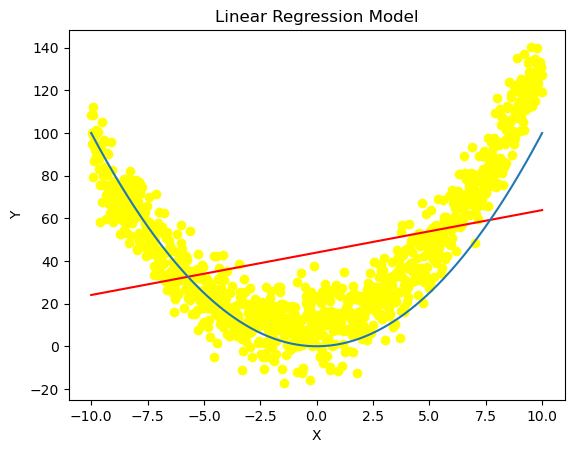

In [30]:
# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# 实例化模型
model = LinearRegressionModel()

# 定义损失函数（均方误差）
criterion = nn.MSELoss()

# 选择优化器（梯度下降）
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试模型
with torch.no_grad():
    predicted = model(x_tensor)
    
plt.scatter(x, y, color='yellow')  # 绘制原始数据点
plt.plot(x, predicted.numpy(), color='red')  # 绘制拟合直线
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.plot(x_plot, y_plot)
plt.show()